# Reflectivity Analysis Example: Neutral Density Filters
This notebook demonstrates fitting the reflectivity of three neutral density filter (NDF) samples (https://en.wikipedia.org/wiki/Neutral-density_filter). NDF is often used as an absorber in radio telescopes (see example: https://ntrs.nasa.gov/archive/nasa/casi.ntrs.nasa.gov/20100022018.pdf).

In [1]:
import numpy as np
from numpy import random as rand
import matplotlib 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import refl
import fpga_daq
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')

In [2]:
p = '../Data_ndf/74-124GHz_0_499_11-18_plate.txt'
h = '../Data_ndf/74-124GHz_0_499_11-18_hdpe.txt'
ndf110 = '../Data_ndf/74-124GHz_0_499_11-18_ndf110.txt'
ndf112 = '../Data_ndf/74-124GHz_0_499_11-18_ndf112.txt'
ndf114 = '../Data_ndf/74-124GHz_0_499_11-18_ndf114.txt'

f,hdpe = fpga_daq.refl_save(p,h,refl.field.N)
f,n110 = fpga_daq.refl_save(p,ndf110,refl.field.N)
f,n112 = fpga_daq.refl_save(p,ndf112,refl.field.N)
f,n114 = fpga_daq.refl_save(p,ndf114,refl.field.N)

## Fitting 

In [3]:
# initial guess passed to fitting funtion: [n_re, n_im, d]
p0_hdpe = [1.5,9e-4,19.]
p0_110 = [1.8,5e-2,7.]
p0_112 = [1.8,4e-2,8.]
p0_114 = [1.8,4e-2,8.]

# bounds on fitting parameters passed to fitting function
bb_hdpe = ([1.2,6e-4,17.],[2,1e-2,22.])
bb_ndf = ([1.4,1e-3,5.],[3,8e-1,9.])

n_popt_HDPE, n_pcov = curve_fit(refl.find_reflectance,f,10*np.log10(hdpe),p0=p0_hdpe, bounds = bb_hdpe)
r_hdpe = refl.find_reflectance(f,*n_popt_HDPE)

n_popt_110, n_pcov = curve_fit(refl.find_reflectance,f,10*np.log10(n110),p0=p0_110, bounds = bb_ndf)
r_n110 = refl.find_reflectance(f,*n_popt_110)

n_popt_112, n_pcov = curve_fit(refl.find_reflectance,f,10*np.log10(n112),p0=p0_112, bounds = bb_ndf)
r_n112 = refl.find_reflectance(f,*n_popt_112)

n_popt_114, n_pcov = curve_fit(refl.find_reflectance,f,10*np.log10(n114),p0=p0_114, bounds = bb_ndf)
r_n114 = refl.find_reflectance(f,*n_popt_114)

## Output of Measurement and Models

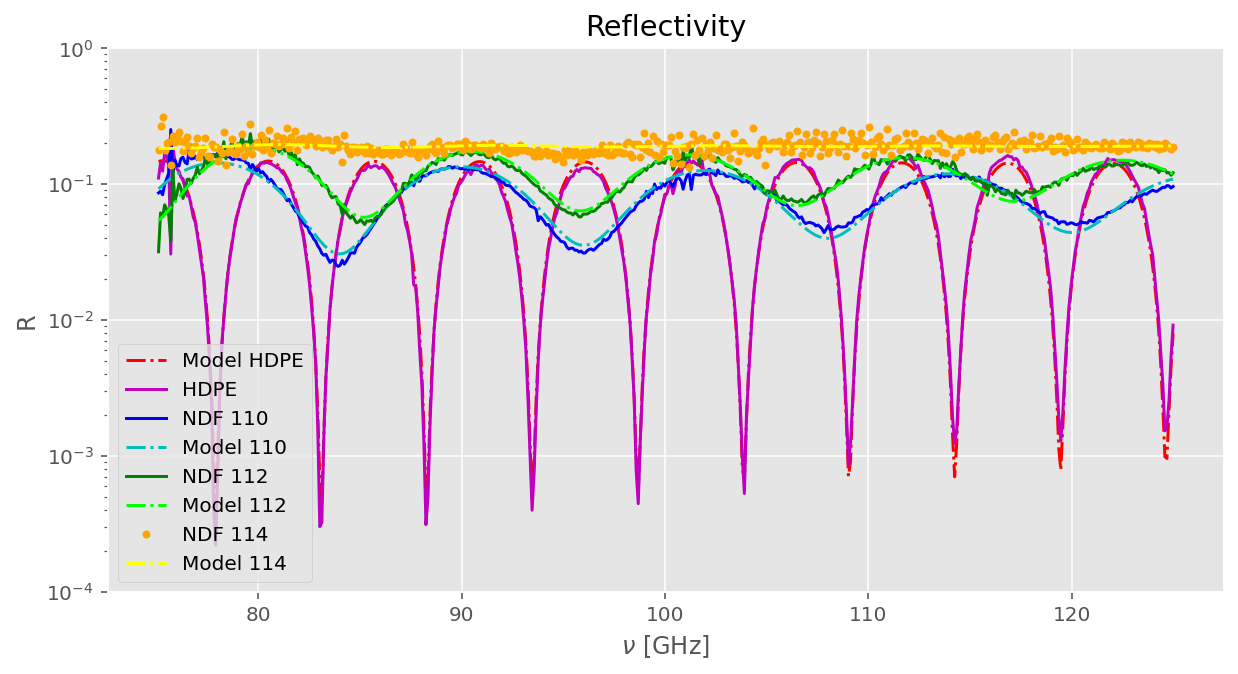

In [4]:
plt.figure(figsize = (10,5))

plt.plot(f,10**(r_hdpe/10),'-.',color = 'r',label = 'Model HDPE')
plt.plot(f,hdpe,color = 'm',label = 'HDPE')

plt.plot(f,n110,color = 'b',label = 'NDF 110')
plt.plot(f,10**(r_n110/10),'-.',color = 'c',label = 'Model 110')

plt.plot(f,n112,color = 'g',label = 'NDF 112')
plt.plot(f,10**(r_n112/10),'-.',color = 'lime',label = 'Model 112')

plt.plot(f,n114,'.',color = 'orange',label = 'NDF 114')
plt.semilogy(f,10**(r_n114/10),'-.',color = 'yellow',label = 'Model 114')

plt.legend()
plt.title('Reflectivity')
plt.ylabel('R')
plt.xlabel(r'$\nu$ [GHz]')

plt.ylim(1e-4,1)
plt.show()

Print the optical properties of all samples: 

In [5]:
print(r"HDPE: D = {:.2f} mm, N = {:.3f} + {:.3f}i, Loss tangent = {:.3f}".\
      format(n_popt_HDPE[2],n_popt_HDPE[0],n_popt_HDPE[1],2*n_popt_HDPE[1]/n_popt_HDPE[0]))
print("NDF 110: D = {:.2f} mm, N = {:.3f} + {:.3f}i, Loss tangent = {:.3f}".\
      format(n_popt_110[2],n_popt_110[0],n_popt_110[1],2*n_popt_110[1]/n_popt_110[0]))
print("NDF 112: D = {:.2f} mm, N = {:.3f} + {:.3f}i, Loss tangent = {:.3f}".\
      format(n_popt_112[2],n_popt_112[0],n_popt_112[1],2*n_popt_112[1]/n_popt_112[0]))
print("NDF 114: D = {:.2f} mm, N = {:.3f} + {:.3f}i, Loss tangent = {:.3f}".\
      format(n_popt_114[2],n_popt_114[0],n_popt_114[1],2*n_popt_114[1]/n_popt_114[0]))

HDPE: D = 18.61 mm, N = 1.542 + 0.001i, Loss tangent = 0.002
NDF 110: D = 6.98 mm, N = 1.782 + 0.039i, Loss tangent = 0.043
NDF 112: D = 6.94 mm, N = 2.023 + 0.047i, Loss tangent = 0.047
NDF 114: D = 5.42 mm, N = 2.555 + 0.220i, Loss tangent = 0.172
